In [1]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import sys
import pandas as pd
import scipy.stats as st

In [2]:
data_df = pd.read_csv("final_auto_stock_data.csv")
data_df['Industry'].unique()

array(['Auto & Truck Dealerships', 'Auto Parts', 'Auto Manufacturers',
       'Semiconductors'], dtype=object)

In [3]:
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df

,Date,Ticker,Sector,Industry,Open,High,Low,Close,Volume
0,2018-01-02,CPRT,Automobiles,Auto & Truck Dealerships,43.52,43.6700,43.190,43.60,860740.0
1,2018-01-03,CPRT,Automobiles,Auto & Truck Dealerships,43.63,43.8500,43.200,43.39,1152481.0
2,2018-01-04,CPRT,Automobiles,Auto & Truck Dealerships,43.50,43.9500,43.300,43.74,1164240.0
3,2018-01-05,CPRT,Automobiles,Auto & Truck Dealerships,43.77,43.8800,43.030,43.53,922916.0
4,2018-01-08,CPRT,Automobiles,Auto & Truck Dealerships,43.59,43.8600,43.280,43.55,1254075.0
...,...,...,...,...,...,...,...,...,...
28602,2023-11-28,INTC,Automobiles,Semiconductors,43.69,44.3827,43.660,44.23,24548874.0
28603,2023-11-29,INTC,Automobiles,Semiconductors,44.60,45.3400,44.600,44.94,38982026.0
28604,2023-11-30,INTC,Automobiles,Semiconductors,44.65,45.0900,44.410,44.70,46262971.0
28605,2023-12-01,INTC,Automobiles,Semiconductors,44.36,44.3600,42.860,43.74,43928371.0


In [4]:
df1 = data_df.loc[data_df['Industry']=="Auto & Truck Dealerships",:]
df2 = data_df.loc[data_df['Industry']=="Auto Parts",:]
df3 = data_df.loc[data_df['Industry']=="Auto Manufacturers",:]
df4 = data_df.loc[data_df['Industry']=="Semiconductors",:]

In [5]:
df1

,Date,Ticker,Sector,Industry,Open,High,Low,Close,Volume
0,2018-01-02,CPRT,Automobiles,Auto & Truck Dealerships,43.52,43.670,43.1900,43.60,860740.0
1,2018-01-03,CPRT,Automobiles,Auto & Truck Dealerships,43.63,43.850,43.2000,43.39,1152481.0
2,2018-01-04,CPRT,Automobiles,Auto & Truck Dealerships,43.50,43.950,43.3000,43.74,1164240.0
3,2018-01-05,CPRT,Automobiles,Auto & Truck Dealerships,43.77,43.880,43.0300,43.53,922916.0
4,2018-01-08,CPRT,Automobiles,Auto & Truck Dealerships,43.59,43.860,43.2800,43.55,1254075.0
...,...,...,...,...,...,...,...,...,...
7450,2023-11-28,AN,Automobiles,Auto & Truck Dealerships,131.34,134.460,130.3500,132.58,479984.0
7451,2023-11-29,AN,Automobiles,Auto & Truck Dealerships,134.55,137.000,133.9748,134.13,743123.0
7452,2023-11-30,AN,Automobiles,Auto & Truck Dealerships,134.82,135.675,133.2300,135.27,492893.0
7453,2023-12-01,AN,Automobiles,Auto & Truck Dealerships,135.29,140.220,135.0350,140.13,404547.0


In [6]:
group_df1 = df1.groupby("Date")['Close'].mean().reset_index()
group_df2 = df2.groupby("Date")['Close'].mean().reset_index()
group_df3 = df3.groupby("Date")['Close'].mean().reset_index()
group_df4 = df4.groupby("Date")['Close'].mean().reset_index()

In [7]:
merged_df = pd.merge(group_df1, group_df2, on='Date', how='inner', suffixes=('_df1', '_df2'))
merged_df = pd.merge(merged_df, group_df3, on='Date', how='inner', suffixes=('_merged', '_df3'))
merged_df = pd.merge(merged_df, group_df4, on='Date', how='inner', suffixes=('_df3', '_df4'))



In [8]:
merged_df

,Date,Close_df1,Close_df2,Close_df3,Close_df4
0,2018-01-02,64.740,78.1200,107.568,113.042
1,2018-01-03,65.802,78.8125,107.550,116.184
2,2018-01-04,66.374,79.9600,107.872,116.330
3,2018-01-05,67.748,81.6375,108.654,117.220
4,2018-01-08,68.818,81.3650,112.870,118.746
...,...,...,...,...,...
1486,2023-11-28,133.242,64.6580,100.814,337.756
1487,2023-11-29,132.850,65.1120,101.290,337.980
1488,2023-11-30,133.144,65.1900,100.476,331.320
1489,2023-12-01,137.902,65.8980,101.136,332.266


In [9]:
merged_df = merged_df.dropna()
merged_df

,Date,Close_df1,Close_df2,Close_df3,Close_df4
0,2018-01-02,64.740,78.1200,107.568,113.042
1,2018-01-03,65.802,78.8125,107.550,116.184
2,2018-01-04,66.374,79.9600,107.872,116.330
3,2018-01-05,67.748,81.6375,108.654,117.220
4,2018-01-08,68.818,81.3650,112.870,118.746
...,...,...,...,...,...
1486,2023-11-28,133.242,64.6580,100.814,337.756
1487,2023-11-29,132.850,65.1120,101.290,337.980
1488,2023-11-30,133.144,65.1900,100.476,331.320
1489,2023-12-01,137.902,65.8980,101.136,332.266


In [10]:
close_columns = ['Close_df1', 'Close_df2', 'Close_df3', 'Close_df4']
correlation_matrix = merged_df[close_columns].corr()
print(correlation_matrix)

           Close_df1  Close_df2  Close_df3  Close_df4
Close_df1   1.000000   0.629198   0.420537   0.830834
Close_df2   0.629198   1.000000   0.370997   0.430962
Close_df3   0.420537   0.370997   1.000000   0.286941
Close_df4   0.830834   0.430962   0.286941   1.000000


In [11]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(merged_df['Close_df1'], merged_df['Close_df4'])

In [14]:
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
line_eq

'y = 1.38x + 33.42'

In [15]:
regressed_values = (slope * merged_df['Close_df1']) + intercept

The r-value is: 0.83


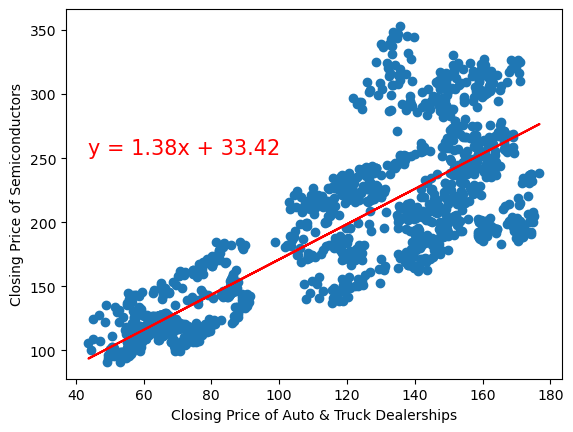

In [22]:
x_axis = merged_df['Close_df1']
y_axis = merged_df['Close_df4']
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regressed_values, color='r')
plt.annotate(line_eq, (min(x_axis), max(y_axis)-100), fontsize=15, color='red')
plt.xlabel("Closing Price of Auto & Truck Dealerships")
plt.ylabel("Closing Price of Semiconductors")
correlation_coefficient = f'The r-value is: {rvalue:.2f}'
print(correlation_coefficient)